In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os


In [2]:
output_path = r"C:\Users\peepl\OneDrive\Desktop\Data sets\FINAL DATASET\Output_folder"


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(output_path, "train"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "valid"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "test"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8606 images belonging to 2 classes.
Found 1124 images belonging to 2 classes.
Found 2758 images belonging to 2 classes.


In [4]:
def build_mobilenet(input_shape):
    base_model = MobileNet(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze the base model initially

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model, base_model  # Return both the model and base_model

model, base_model = build_mobilenet((150, 150, 3))


17225924/17225924 [==============================] - 13s 1us/step


In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10  # Start with 10 epochs and adjust based on performance
)


Epoch 1/10
268/268 [==============================] - 180s 665ms/step - loss: 0.3149 - accuracy: 0.8801 - val_loss: 0.2035 - val_accuracy: 0.9411
Epoch 2/10
268/268 [==============================] - 146s 544ms/step - loss: 0.2105 - accuracy: 0.9188 - val_loss: 0.1957 - val_accuracy: 0.9366
Epoch 3/10
268/268 [==============================] - 144s 538ms/step - loss: 0.1806 - accuracy: 0.9311 - val_loss: 0.2398 - val_accuracy: 0.9259
Epoch 4/10
268/268 [==============================] - 143s 533ms/step - loss: 0.1720 - accuracy: 0.9342 - val_loss: 0.1286 - val_accuracy: 0.9554
Epoch 5/10
268/268 [==============================] - 135s 505ms/step - loss: 0.1626 - accuracy: 0.9384 - val_loss: 0.1954 - val_accuracy: 0.9268
Epoch 6/10
268/268 [==============================] - 139s 517ms/step - loss: 0.1547 - accuracy: 0.9406 - val_loss: 0.2658 - val_accuracy: 0.9054
Epoch 7/10
268/268 [==============================] - 143s 535ms/step - loss: 0.1454 - accuracy: 0.9439 - val_loss: 0.1265 -

In [9]:
# 10. Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

87/87 [==============================] - 28s 319ms/step - loss: 0.0724 - accuracy: 0.9746
Test Accuracy: 97.46%


In [11]:
import matplotlib.pyplot as plt


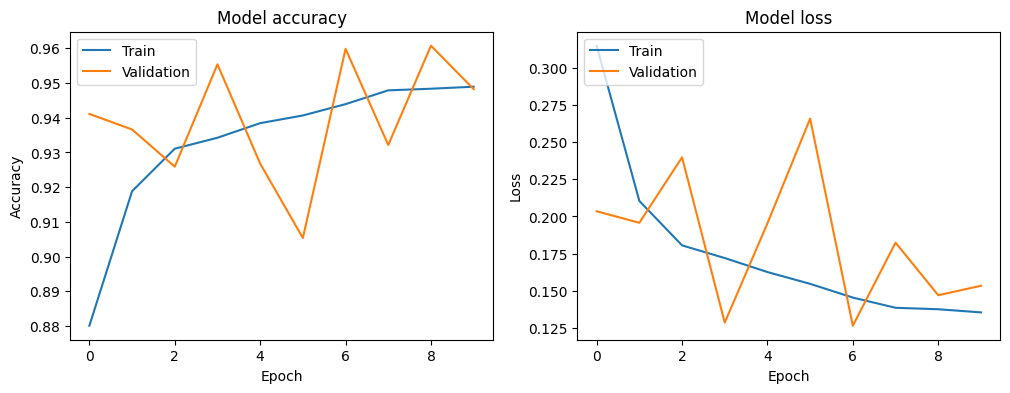

In [12]:
import matplotlib.pyplot as plt

# 11. Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


87/87 [==============================] - 28s 318ms/step


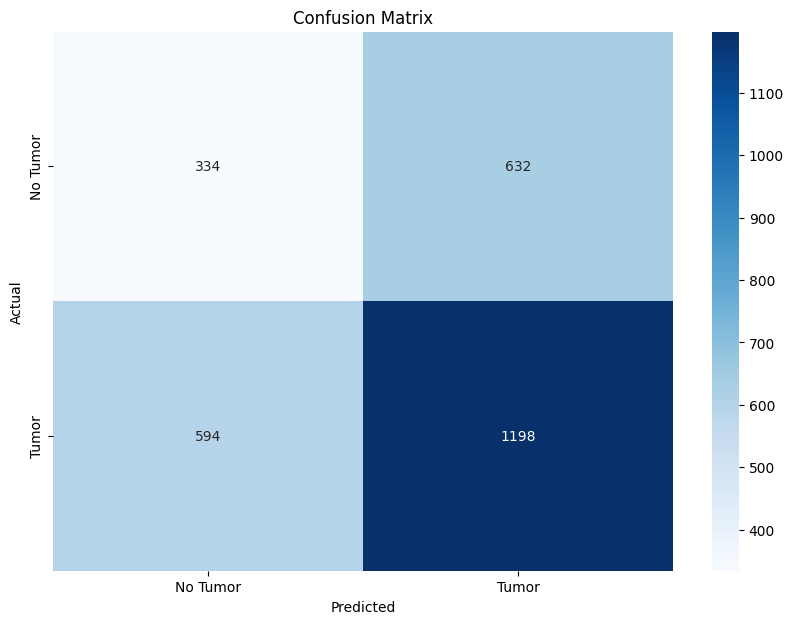

              precision    recall  f1-score   support

    No Tumor       0.36      0.35      0.35       966
       Tumor       0.65      0.67      0.66      1792

    accuracy                           0.56      2758
   macro avg       0.51      0.51      0.51      2758
weighted avg       0.55      0.56      0.55      2758



In [19]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 12. Create confusion matrix and classification report
# Get predictions from the model
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).flatten()  # Round and flatten predictions to binary labels

# Get true labels
y_true = test_generator.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))
